# SOBREVIVENTES TITANIC

## IMPORTAÇÕES DE BIBLIOTECAS

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

## IMPORTAÇÃO DO DATASET

dataset sobre os sobreviventes ao naufrágio do Titanic.
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv);

conjunto de teste (test.csv);

In [2]:
train = pd.read_csv('C:/Users/PICHAU/Desktop/Análises de dados/Machine Learning/Regressão Logística I/dados/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Traduzindo colunas do dataset
train.rename(columns={'PassengerId':'Id_passageiro', 'Survived':'Sobreviveu', 'Pclass':'Classe','Name':'Nome',
                      'Sex':'Sexo', 'Age':'Idade','SibSp':'irmaos/conjuges','Parch':'pais/filhos','Fare':'Tarifa',
                      'Cabin':'Cabine', 'Embarked':'Embarcacao'}, inplace=True)
train.head()

,Id_passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,irmaos/conjuges,pais/filhos,Ticket,Tarifa,Cabine,Embarcacao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dicionário de dados

**Sobreviveu** → Sobrevivência 0 = Não, 1 = Sim;

**Classe** → Classe do Bilhete = 1º, 2 = 2º, 3 = 3º;

**Idade** → Idade em anos;

**irmaos/copjuges** → irmãos/cônjugesa bordo do Titanic;

**pais/filhos** → pais/filhos a bordo do Titanic;

**Ticket** → número do bilhete;

**tarifa** → Tarifa de passageiro;

**Cabine** → Número da cabine;

**embarcacao** → Porto de Embarque C = Cherbourg, Q = Queenstown, S = Southampton;

In [4]:
#Visualizar algumas informações em geral e dados faltantes
train.describe()

,Id_passageiro,Sobreviveu,Classe,Idade,irmaos/conjuges,pais/filhos,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_passageiro    891 non-null    int64  
 1   Sobreviveu       891 non-null    int64  
 2   Classe           891 non-null    int64  
 3   Nome             891 non-null    object 
 4   Sexo             891 non-null    object 
 5   Idade            714 non-null    float64
 6   irmaos/conjuges  891 non-null    int64  
 7   pais/filhos      891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Tarifa           891 non-null    float64
 10  Cabine           204 non-null    object 
 11  Embarcacao       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


obs: Idade, Cabine e Embarcação com alguns dados faltantes

## TRATAMENTO DE DADOS

<AxesSubplot:>

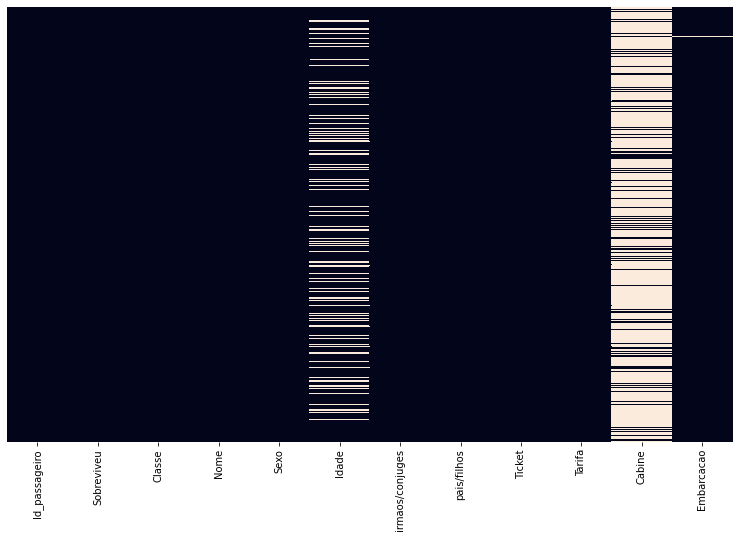

In [6]:
#Ultizar o heatmap para verificar os dados faltantes e tratar-los
plt.figure(figsize=(13,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

obs:cada barra em branco é um dado faltante

In [7]:
faltantes_idade = train['Idade'].isnull().sum()
faltantes_cabine = train['Cabine'].isnull().sum()
faltantes_embarcação = train['Embarcacao'].isnull().sum()

print(f'Na Idade temos {faltantes_idade} dados faltantes\n'
      f'Na Cabine temos {faltantes_cabine} dados faltantes\n'
      f'Na Embarcacao temos {faltantes_embarcação} dados faltantes')

Na Idade temos 177 dados faltantes
Na Cabine temos 687 dados faltantes
Na Embarcacao temos 2 dados faltantes


In [8]:
#Configurando paleta de cores
sns.set_palette('Set1')
sns.set_style('whitegrid')

#### Tratamento coluna Idade

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

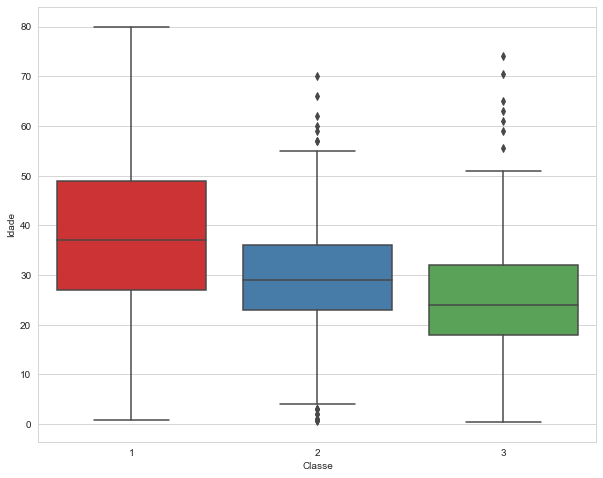

In [9]:
#Visualizar as distribuições das idades
#Para verificar a mediana das idades pela classe
plt.figure(figsize=(10,8))
sns.boxplot(x='Classe', y='Idade', data=train)

In [10]:
train['Idade'].sample(10)

193     3.0
814    30.5
236    44.0
521    22.0
35     42.0
368     NaN
139    24.0
205     2.0
636    32.0
662    47.0
Name: Idade, dtype: float64

In [11]:
#Criando uma função para inputar as idades faltantes de acordo com a classe
def inputar_idades(colunas):
    idade = colunas[0]
    classe = colunas[1]
    if pd.isnull(idade):
        if classe == 1:
            return 37
        elif classe == 2:
            return 29
        else:
            return 24
    else:
        return idade
    

In [12]:
#Utilizando a função para o input
train['Idade'] = train[['Idade', 'Classe']].apply(inputar_idades, axis=1)

In [13]:
train['Idade']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Idade, Length: 891, dtype: float64

#### Tratamento coluna Cabine

In [14]:
train['Cabine']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabine, Length: 891, dtype: object

**obs:**Devido ao grande quantidade de dados faltantes na coluna Cabine, ela será deletada

In [15]:
#Deletando coluna Cabine
train.drop('Cabine', inplace=True, axis=1)

In [16]:
train

,Id_passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,irmaos/conjuges,pais/filhos,Ticket,Tarifa,Embarcacao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Tratamento coluna Embarcacao

In [17]:
#Como faltou apenas 2 linhas com dados faltantes na coluna Embarcacao utilizaremos o dropna para deletar as 2 linhas faltantes
train.dropna(inplace=True)

In [18]:
train['Embarcacao'].isnull().sum()

0

<AxesSubplot:>

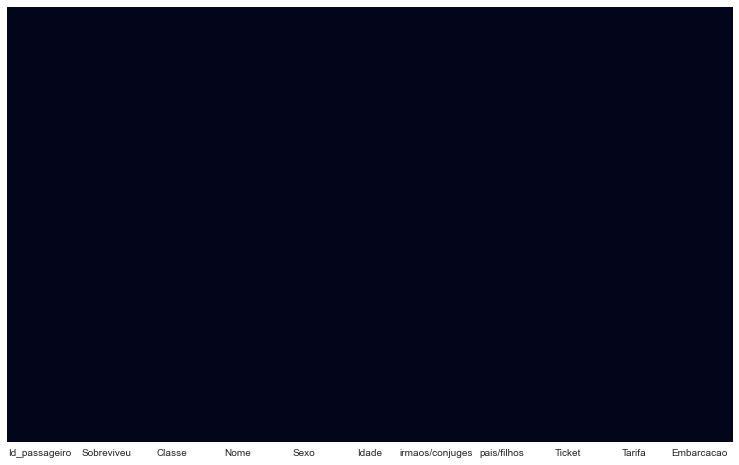

In [19]:
#novamente o heatmap para verificar os dados faltantes
plt.figure(figsize=(13,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [20]:
train.isnull().sum()

Id_passageiro      0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade              0
irmaos/conjuges    0
pais/filhos        0
Ticket             0
Tarifa             0
Embarcacao         0
dtype: int64

## ANÁLISE EXPLORATÓRIA

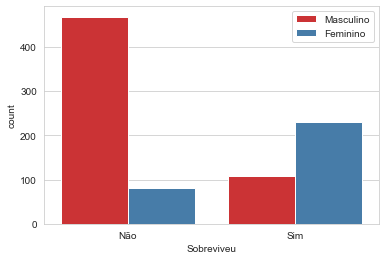

In [21]:
#Contagem de sobreviventes 
ax = sns.countplot(data=train, x='Sobreviveu', hue='Sexo')
ax = plt.legend(['Masculino', 'Feminino'])
ticks, labels = plt.xticks()
ax = plt.xticks(ticks, labels=['Não', 'Sim'])

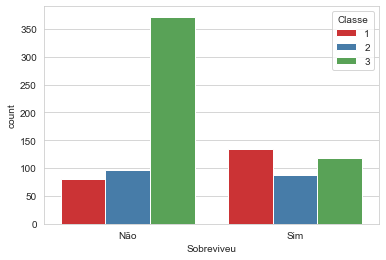

In [22]:
#Contagem de sobreviventes
ax = sns.countplot(data=train, x='Sobreviveu', hue='Classe')
ticks, labels = plt.xticks()
ax = plt.xticks(ticks, labels=['Não', 'Sim'])

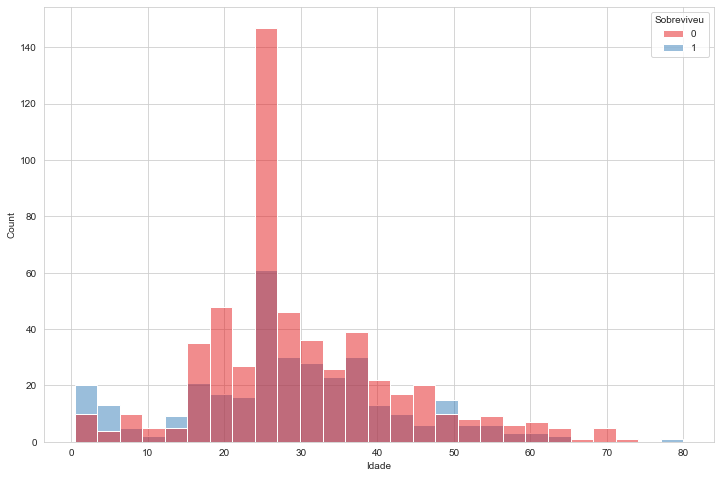

In [23]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=train, x='Idade', hue='Sobreviveu')

Conclusões: 
    Maioria dos falecidos eram Homens, estavam na 3ªClasse e tinham 24 anos

In [28]:
### Convertendo variáveis categoricas com dummy
Sexo = pd.get_dummies(train['Sexo'], drop_first=True)
Sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [33]:
train['Embarcacao'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
Embarcacao = pd.get_dummies(train['Embarcacao'], drop_first=True)
Embarcacao

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
## Removendo algumas colunas irrelevantes para o modelo

In [37]:
train.drop(['Sexo', 'Id_passageiro','Nome', 'Ticket', 'Embarcacao'], axis=1, inplace=True)
train

,Sobreviveu,Classe,Idade,irmaos/conjuges,pais/filhos,Tarifa
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [40]:
#concatenando as variáveis Sexo e Embarcacao, agora numéricas
train = pd.concat([train, Sexo, Embarcacao], axis=1)
train

,Sobreviveu,Classe,Idade,irmaos/conjuges,pais/filhos,Tarifa,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## Treinar e testar os dados

In [52]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train.columns

Index(['Sobreviveu', 'Classe', 'Idade', 'irmaos/conjuges', 'pais/filhos',
       'Tarifa', 'male', 'Q', 'S'],
      dtype='object')

In [47]:
X= train[['Classe', 'Idade', 'irmaos/conjuges', 'pais/filhos','Tarifa', 'male', 'Q', 'S']]
y = train['Sobreviveu']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [53]:
lm=LogisticRegression()

In [56]:
lm.fit(X_train, y_train)

LogisticRegression()

In [57]:
prediction = lm.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [64]:
#Visualizar a precisão do modelo
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



**obs:** Modelo teve 82% de precisão

In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
#Matriz de confusão
print(confusion_matrix(y_test, prediction))

[[147  16]
 [ 30  74]]
